(79, 100, 100, 3)
(82, 100, 100, 3)


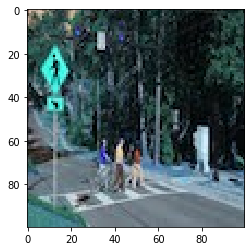

In [43]:
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
greendata = []
for i in range(1,10):
    x = 'green/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x))
        greendata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'green/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        greendata.append(cv2.imread(x))
    except:
         pass
greendata = np.array(greendata)
reddata = []
for i in range(1,10):
    x = 'red/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x))
        reddata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'red/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        reddata.append(cv2.imread(x))
    except:
         pass
reddata = np.array(reddata)
print(reddata.shape)
print(greendata.shape)

In [2]:
import numpy as np
def same_shuffle(arr1,arr2):
    assert arr1.size == arr2.size
    size = arr1.size
    idxs = np.arange(size)
    np.random.shuffle(idxs)
    return arr1[idxs], arr2[idxs]

In [46]:
greenlist = list(greendata)
print(g)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [18]:
# Change these values
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [34]:
y_train = np.zeros(82)

In [35]:
history = model.fit(data, y_train, epochs=10, batch_size=4)

Train on 82 samples
Epoch 1/10
82/82 [==============================] - 1s 9ms/sample - loss: 151.3517 - accuracy: 0.8049
Epoch 2/10
82/82 [==============================] - 1s 8ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
82/82 [==============================] - 1s 9ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
82/82 [==============================] - 1s 10ms/sample - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
44/82 [===============>..............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

KeyboardInterrupt: 

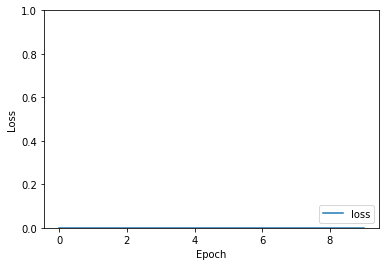

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [36]:
model.predict(tf.cast(np.array([data[0],data[1]]),tf.float32))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)